In [2]:
from tensorflow import keras

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [3]:
import numpy as np
vec = np.array([1, 2, 3])

In [4]:
def vectorize_data(data, dim=10_000):
    v = np.zeros((data.shape[0], dim))
    for i, item in enumerate(data):
        v[i, item] = 1
    return v
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

model = keras.Sequential()
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])




In [5]:
x_validation, partial_x_train = x_train[:10_000], x_train[10_000:]
y_validation, partial_y_train = y_train[:10_000], y_train[10_000:]
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=4,
                   batch_size=512,
                   validation_data=(x_validation, y_validation))



Epoch 1/4
30/30 [==============================] - 7s 182ms/step - loss: 0.5926 - accuracy: 0.6779 - val_loss: 0.3824 - val_accuracy: 0.8721
Epoch 2/4
30/30 [==============================] - 1s 23ms/step - loss: 0.3183 - accuracy: 0.9060 - val_loss: 0.3063 - val_accuracy: 0.8845
Epoch 3/4
30/30 [==============================] - 1s 34ms/step - loss: 0.2286 - accuracy: 0.9279 - val_loss: 0.2781 - val_accuracy: 0.8918
Epoch 4/4
30/30 [==============================] - 1s 20ms/step - loss: 0.1691 - accuracy: 0.9469 - val_loss: 0.2811 - val_accuracy: 0.8890


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


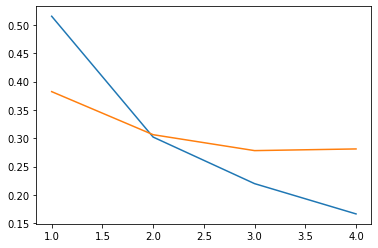

In [6]:
import matplotlib.pyplot as plt
history_dict = history.history # <- fucking retarded
print(history_dict.keys())

epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, history_dict['loss'])
plt.plot(epochs, history_dict['val_loss'])
plt.show()

In [7]:
model.save('imdb_model.h5')

In [9]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'cats_and_dogs_CNN.ipynb', 'display_digits.py', 'housing.ipynb', 'imdb_classification.py', 'imdb_model.h5', 'imdb_notebook.ipynb', 'mnist.ipynb', 'reuters.ipynb', 'tftestbook.py', 'Untitled.ipynb']


In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None
